## *Select best cities in **California** based on differenet education level and also considering house value and monthly rent*

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import requests
import json
from pprint import pprint
import gmaps

# API Keys
from my_keys import g_key
gmaps.configure(api_key=g_key)

In [2]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")
ca_2019_data.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


### filtering invalid entries

In [3]:
#ca_2019_data["House Value"].dtype
filt=((ca_2019_data["House Value"]>0)&
     (ca_2019_data["High School Rate"]>0)&
     (ca_2019_data["College Rate"]>0)&
     (ca_2019_data["Uneducated Rate"]>0)&
     (ca_2019_data['Monthly Rent']>0)&
     (ca_2019_data['Unemployment Rate']>0))
    
ca_2019_data=ca_2019_data.loc[filt,:]


In [4]:
ca_2019_data.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,90001,59832.0,29.1,43360.0,13727.0,25.496390,3.929335,359000.0,1949,1853.0,...,41.882270,8.921647,90.134042,0.315884,Los Angeles,Los Angeles County,33.97,-118.25,13788.0,CA
1,90002,53302.0,28.0,37285.0,13284.0,31.188323,4.110540,345900.0,1954,1813.0,...,42.973997,18.912986,78.886346,1.029980,Los Angeles,Los Angeles County,33.95,-118.25,12598.0,CA
2,90003,73730.0,28.3,40598.0,13441.0,29.959311,4.002441,362800.0,1954,1892.0,...,33.116777,20.676794,78.348027,0.297030,Los Angeles,Los Angeles County,33.96,-118.27,17127.0,CA
3,90004,60541.0,35.2,49675.0,32090.0,17.784642,2.685783,1063200.0,1946,3489.0,...,35.676649,3.614080,50.289886,25.465387,Los Angeles,Los Angeles County,34.08,-118.31,24278.0,CA
4,90005,39732.0,35.6,38491.0,24267.0,25.999195,3.289540,777100.0,1950,3149.0,...,23.336354,5.763616,49.481526,34.221786,Los Angeles,Los Angeles County,34.06,-118.31,16345.0,CA


In [5]:
ca_2019_data.columns


Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [6]:
ca_2019_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1762
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zipcode                   1300 non-null   int64  
 1   Population                1300 non-null   float64
 2   Median Age                1300 non-null   float64
 3   Household Income          1300 non-null   float64
 4   Per Capita Income         1300 non-null   float64
 5   Poverty Rate              1300 non-null   float64
 6   Unemployment Rate         1300 non-null   float64
 7   House Value               1300 non-null   float64
 8   House Construction Year   1300 non-null   int64  
 9   Monthly Owner Cost        1300 non-null   float64
 10  Monthly Rent              1300 non-null   float64
 11  Public Transport Rate     1300 non-null   float64
 12  Personal Transport Rate   1300 non-null   float64
 13  Commute Time Public       599 non-null    float64
 14  Commute 

In [7]:
func_dict={'High School Rate':"mean",'College Rate':"mean","Uneducated Rate":"mean",
           'Zipcode':"first",'Lat':"first", 'Lng':"first",'House Value':"first",'Monthly Rent':"first"}

grp_object=ca_2019_data.groupby("County")
county_education=ca_2019_data.groupby("County").agg(func_dict)


## *Searching for best counties in **California** based on average highschool rating*

In [8]:
# searching top 5 cities in top 5 counties based on college rate

county_highschool=county_education.sort_values(by="High School Rate",ascending=False)
county_highschool.head()

,High School Rate,College Rate,Uneducated Rate,Zipcode,Lat,Lng,House Value,Monthly Rent
County,,,,,,,,
Trinity County,23.372515,7.420391,0.260521,96041,40.5,-123.2,306400.0,669.0
Sierra County,23.215289,6.857785,1.236650,96118,39.6,-120.2,203400.0,933.0
Modoc County,21.043858,8.135730,0.639010,96101,41.6,-120.7,122000.0,749.0
Mariposa County,20.214497,10.238674,0.708763,95311,37.7,-120.0,235200.0,789.0
Inyo County,19.191598,15.648234,0.541463,92328,36.4,-117.1,9999.0,263.0


## *Searching for top 20 cities based on  Highschool Rating*

In [9]:
best_highschool=ca_2019_data.sort_values(by="High School Rate",ascending=False).reset_index(drop=True)
best_highschool_cities=best_highschool.loc[0:19,["Zipcode","City","High School Rate",
                                        "Lat","Lng","House Value","Monthly Rent"]]
best_highschool_cities

,Zipcode,City,High School Rate,Lat,Lng,House Value,Monthly Rent
0,96041,Hayfork,32.515337,40.500,-123.200,306400.0,669.0
1,92268,Pioneertown,31.428571,34.157,-116.497,286500.0,846.0
2,92358,Lytle Creek,29.778393,34.300,-117.500,305200.0,1372.0
3,92004,Borrego Springs,29.665072,33.100,-116.100,170900.0,729.0
4,91905,Boulevard,29.483696,32.700,-116.300,281600.0,722.0
5,93601,Ahwahnee,28.554361,37.370,-119.740,300700.0,779.0
6,93526,Independence,27.980922,36.800,-118.000,170200.0,890.0
7,92242,Earp,27.667683,34.300,-114.300,77700.0,620.0
8,95970,Princeton,26.948052,39.430,-122.070,324400.0,1027.0
9,93285,Wofford Heights,26.725878,35.700,-118.500,109100.0,948.0


## *Plotting location of top 20 cities with best highschool rating*

In [69]:
fig=gmaps.figure()

city_lat=[]
city_lng=[]

for index,row in best_highschool_cities.iterrows():
    
    lat=row["Lat"]
    lng=row["Lng"]
    city_lat.append(lat)
    city_lng.append(lng) 

location=list(zip(city_lat,city_lng))

markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

##  *California County and city list sorted based on High School Rating*

In [11]:
top_highschool_cities=ca_2019_data.groupby(["County","City"])["High School Rate"].nlargest()
top_highschool_cities.head(20)

County          City               
Alameda County  Alameda        1003     8.432961
                               1004     5.469016
                Albany         1104     4.152135
                Berkeley       1108     7.525656
                               1100     5.877817
                               1103     3.489318
                               1101     3.332258
                               1105     2.150081
                Castro Valley  1039    13.004191
                               1045     7.183023
                Dublin         1058     6.270680
                Emeryville     1091     8.815658
                Fremont        1033    15.656401
                               1032    12.710290
                               1047     8.940174
                               1034     5.223528
                Hayward        1037    20.280387
                               1038    18.087642
                               1035    15.855175
                               10

## *City with highest highschool rating*

In [12]:
city_name=best_highschool.loc[0,"City"]
county_name=best_highschool.loc[0,"County"]
high_school_rating=best_highschool.loc[0,"High School Rate"]

print(f"{city_name} city of{county_name} has highest high school rating:{round(high_school_rating,2)}")

Hayfork city ofTrinity County has highest high school rating:32.52


## *Searching for best counties in **California** based on average college rating*

In [14]:
# searching top 5 cities in top 5 counties based on college rate

county_college=county_education.sort_values(by="College Rate",ascending=False)
county_college.head(10)

,High School Rate,College Rate,Uneducated Rate,Zipcode,Lat,Lng,House Value,Monthly Rent
County,,,,,,,,
San Francisco County,7.734465,28.238601,2.085528,94102,37.78,-122.42,906600.0,1146.0
Marin County,6.561607,26.821262,1.041340,94901,37.97,-122.50,1020200.0,1826.0
San Mateo County,8.372977,21.436784,1.268708,94002,37.51,-122.30,1524000.0,2342.0
Alameda County,9.814554,20.581190,1.534643,94501,37.77,-122.28,855300.0,1816.0
Contra Costa County,9.933305,19.693035,1.134679,94505,37.88,-121.59,615200.0,2532.0
Santa Clara County,8.178781,19.686641,1.518357,94022,37.36,-122.15,2000001.0,3172.0
Orange County,10.035038,19.338108,1.511753,90620,33.84,-118.01,576700.0,1820.0
Nevada County,12.819701,18.338272,0.312599,95945,39.20,-120.90,372000.0,1118.0
Placer County,12.160559,17.862807,0.472987,95602,38.99,-121.10,471000.0,1277.0


## *Searching for top 20 cities with highest college rating* 

In [15]:
best_college=ca_2019_data.sort_values(by="College Rate",ascending=False).reset_index(drop=True)
best_college_cities=best_college.loc[0:19,["Zipcode","City","College Rate",
                                        "Lat","Lng","House Value","Monthly Rent"]]
best_college_cities

,Zipcode,City,College Rate,Lat,Lng,House Value,Monthly Rent
0,94123,San Francisco,45.125531,37.80,-122.44,2000001.0,2506.0
1,90069,West Hollywood,38.976767,34.09,-118.38,846700.0,1832.0
2,90254,Hermosa Beach,38.062337,33.86,-118.40,1542900.0,2181.0
3,90048,Los Angeles,37.409838,34.07,-118.38,1229900.0,2144.0
4,90293,Playa Del Rey,37.303583,33.95,-118.44,800400.0,2281.0
5,94117,San Francisco,37.238522,37.77,-122.44,1443500.0,2270.0
6,90046,Los Angeles,37.188605,34.11,-118.37,1183200.0,1699.0
7,90292,Marina Del Rey,36.205359,33.98,-118.45,978900.0,2968.0
8,90403,Santa Monica,35.612083,34.03,-118.49,1246500.0,1959.0
9,94109,San Francisco,35.473456,37.79,-122.42,1095700.0,1826.0


## *Plotting location of top 20 cities with best college rating*

In [70]:
fig=gmaps.figure()

city_lat=[]
city_lng=[]

for index,row in best_college_cities.iterrows():
    
    lat=row["Lat"]
    lng=row["Lng"]
    city_lat.append(lat)
    city_lng.append(lng) 

location=list(zip(city_lat,city_lng))

markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

## *California County and City List Sorted based on college rating*

In [18]:
top_college_cities=ca_2019_data.groupby(["County","City"])["College Rate"].nlargest()
top_college_cities.head(20)

County          City               
Alameda County  Alameda        1004    28.916400
                               1003    24.297645
                Albany         1104    22.480912
                Berkeley       1103    27.589266
                               1100    25.385528
                               1105    25.019121
                               1107    24.943519
                               1106    24.618220
                Castro Valley  1045    26.609988
                               1039    20.113570
                Dublin         1058    26.208459
                Emeryville     1091    29.997098
                Fremont        1034    23.618639
                               1047    21.955403
                               1032    21.252856
                               1033    18.561224
                Hayward        1036    21.327981
                               1038    15.535998
                               1035    13.975852
                               10

## *California city with highest college rating*

In [19]:
best_college=ca_2019_data.sort_values(by="College Rate",ascending=False).reset_index(drop=True)
city_name=best_college.loc[0,"City"]
county_name=best_college.loc[0,"County"]
college_rating=best_college.loc[0,"College Rate"]

print(f"{city_name} city of {county_name} has highest college rating:{round(college_rating,2)}")

San Francisco city of San Francisco County has highest college rating:45.13


## *Searching for top 5 counties in **California** based on avg lowest uneducation rate*

In [20]:
county_education=county_education.sort_values(by="Uneducated Rate")
county_education.head()

,High School Rate,College Rate,Uneducated Rate,Zipcode,Lat,Lng,House Value,Monthly Rent
County,,,,,,,,
Mono County,13.220728,14.440621,0.145970,93546,37.60,-118.8,355300.0,1244.0
Trinity County,23.372515,7.420391,0.260521,96041,40.50,-123.2,306400.0,669.0
Lassen County,16.914012,9.548473,0.261709,96130,40.50,-120.5,207100.0,985.0
Nevada County,12.819701,18.338272,0.312599,95945,39.20,-120.9,372000.0,1118.0
Placer County,12.160559,17.862807,0.472987,95602,38.99,-121.1,471000.0,1277.0


## *Searching for top 10 cities with lowest uneducation rate*

In [21]:
lowest_uneducated=ca_2019_data.sort_values(by="Uneducated Rate").reset_index(drop=True)
lowest_uneducated_cities=lowest_uneducated.loc[0:19,["Zipcode","City","Uneducated Rate",
                                        "Lat","Lng","House Value","Monthly Rent"]]
lowest_uneducated_cities

,Zipcode,City,Uneducated Rate,Lat,Lng,House Value,Monthly Rent
0,92663,Newport Beach,0.013667,33.62,-117.93,1462700.0,1916.0
1,95946,Penn Valley,0.033419,39.20,-121.20,408700.0,1655.0
2,94618,Oakland,0.034779,37.85,-122.24,1208800.0,2164.0
3,95030,Los Gatos,0.037089,37.23,-122.00,2000001.0,2262.0
4,92127,San Diego,0.038049,33.02,-117.14,819900.0,2053.0
5,95064,Santa Cruz,0.047683,36.99,-122.06,370000.0,1669.0
6,94960,San Anselmo,0.056718,38.00,-122.59,1150100.0,1964.0
7,94939,Larkspur,0.059286,37.94,-122.53,1551400.0,2206.0
8,92010,Carlsbad,0.061177,33.16,-117.28,678800.0,2165.0
9,92603,Irvine,0.061356,33.63,-117.80,1280500.0,2491.0


## *Plotting 10 cities with lowest uneducation rate* 

In [22]:
fig=gmaps.figure()

city_lat=[]
city_lng=[]

for index,row in lowest_uneducated_cities.iterrows():
    
    lat=row["Lat"]
    lng=row["Lng"]
    city_lat.append(lat)
    city_lng.append(lng) 

location=list(zip(city_lat,city_lng))

markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

## *Scatter plot highschool rating vs college rating*

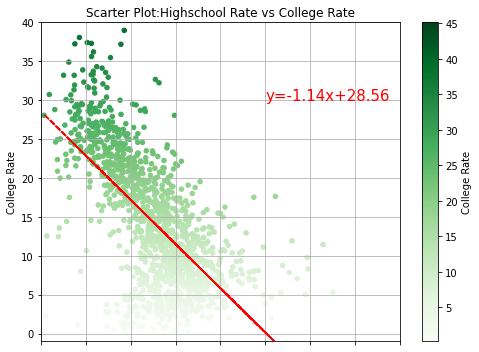

In [38]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["College Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="College Rate",grid=True,figsize=(7,5),
                  c="College Rate",cmap="Greens")

plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.xlim(0,40)
plt.ylim(-1,40)
plt.xlabel("High School Rate")
plt.title("Scarter Plot:Highschool Rate vs College Rate")
plt.tight_layout()
plt.show()

## *Scatter plot highschool rating vs uneducation rate*

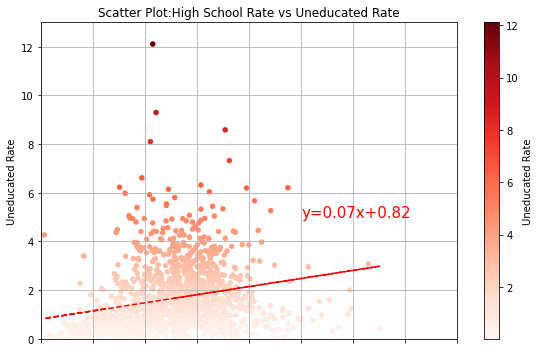

In [46]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Uneducated Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Uneducated Rate",grid=True,figsize=(8,5),
                  c="Uneducated Rate",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,5),fontsize=15,color="red")
plt.xlim(0,40)
plt.ylim(0,13)
plt.xlabel("High School Rating")
plt.title("Scatter Plot:High School Rate vs Uneducated Rate")
plt.tight_layout()
plt.show()

## *Scatter plot college rating vs uneducation rate*

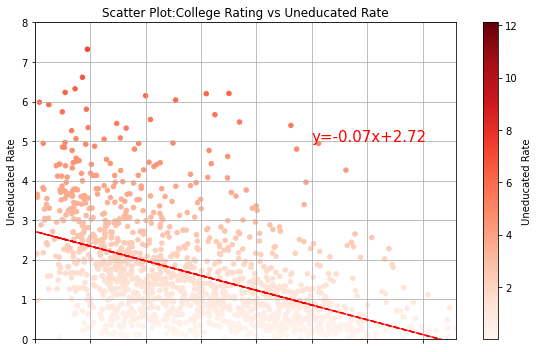

In [49]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Uneducated Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Uneducated Rate",grid=True,figsize=(8,5),
                  c="Uneducated Rate",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,5),fontsize=15,color="red")
plt.xlim(0,38)
plt.ylim(0,8)
plt.xlabel("College Rate")
plt.title("Scatter Plot:College Rating vs Uneducated Rate")
plt.tight_layout()
plt.show()

## *Scatter plot highschool rating vs house value*

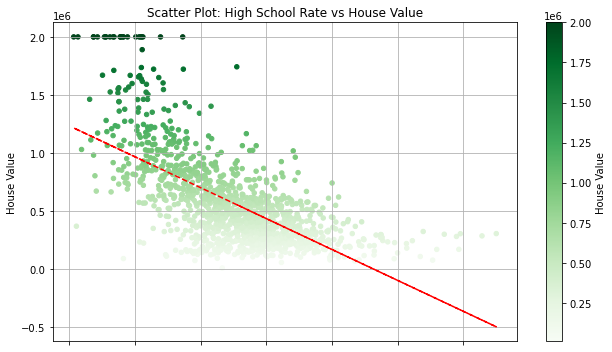

In [52]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["House Value"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept

ca_2019_data.plot(kind="scatter",x="High School Rate",y="House Value",grid=True,figsize=(9,5),
                  c="House Value",cmap="Greens")
plt.plot(x_values,regress_values,"r--")

plt.xlabel("High School Rate")
plt.title("Scatter Plot: High School Rate vs House Value")
plt.tight_layout()
plt.show()

## *Scatter plot highschool rating vs monthly rent*

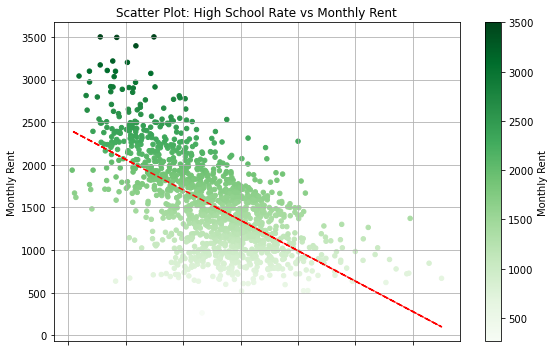

In [55]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Monthly Rent"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Monthly Rent",grid=True,figsize=(8,5),
                  c="Monthly Rent",cmap="Greens")
plt.plot(x_values,regress_values,"r--")
plt.xlabel("High School Rate")
plt.title("Scatter Plot: High School Rate vs Monthly Rent")
plt.tight_layout()
plt.show()

## *Scatter plot college rating vs house value*

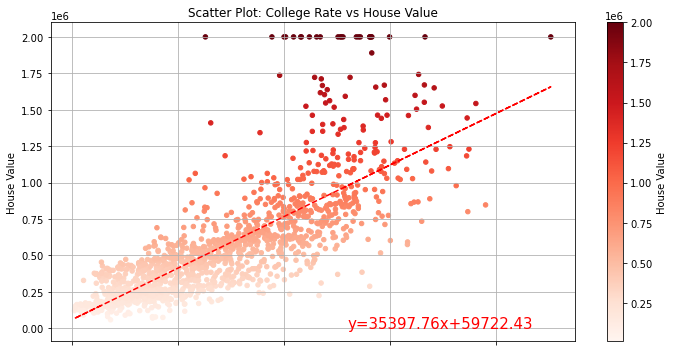

In [58]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["House Value"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="House Value",grid=True,figsize=(10,5),
                 c="House Value",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(26,5.5),fontsize=15,color="red")
plt.xlabel("College Rate")
plt.title("Scatter Plot: College Rate vs House Value")
plt.tight_layout()
plt.show()

## *Scatter plot college rating vs monthly rent*

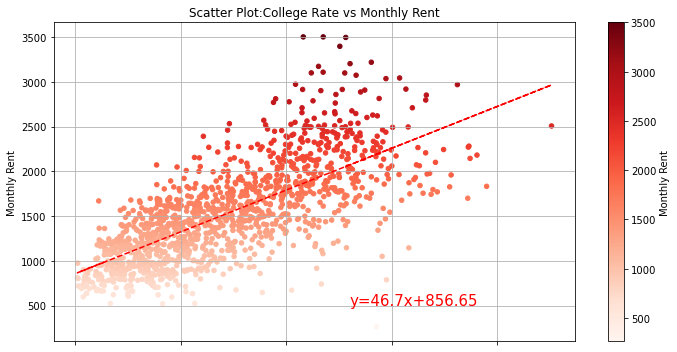

In [59]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Monthly Rent"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Monthly Rent",grid=True,figsize=(10,5),
                 c="Monthly Rent",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(26,500),fontsize=15,color="red")
plt.xlabel("College Rate")
plt.title("Scatter Plot:College Rate vs Monthly Rent")
plt.tight_layout()
plt.show()

## *Scatter plot high school rating vs unemployment rate*

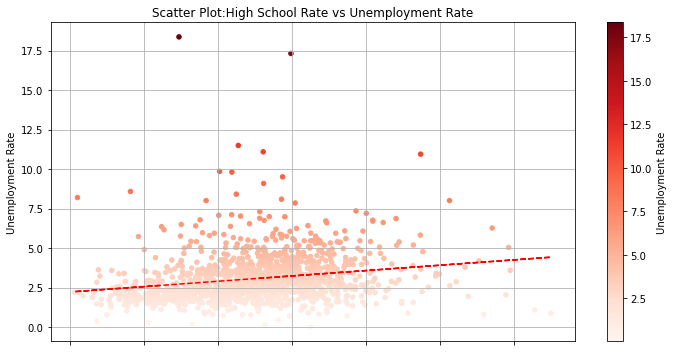

In [60]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Unemployment Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Unemployment Rate",grid=True,figsize=(10,5),
                 c="Unemployment Rate",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.xlabel("High School Rate")
plt.title("Scatter Plot:High School Rate vs Unemployment Rate")
plt.tight_layout()
plt.show()

## *Scatter plot college rating vs unemployment rate*

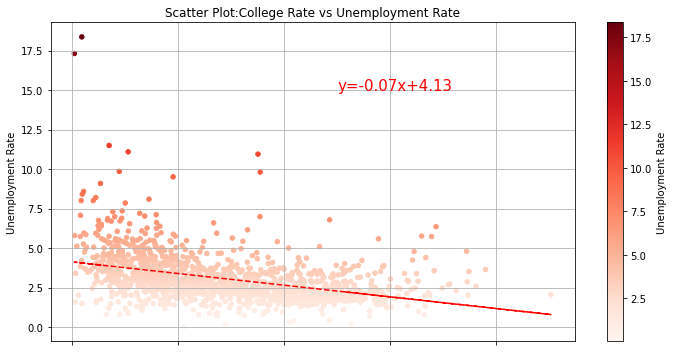

In [61]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Unemployment Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Unemployment Rate",grid=True,figsize=(10,5),
                 c="Unemployment Rate",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,15),fontsize=15,color="red")
plt.xlabel("College Rate")
plt.title("Scatter Plot:College Rate vs Unemployment Rate")
plt.tight_layout()
plt.show()

## *Pie chart to see approx. educated and uneducated proportion in California*

In [279]:
ca_total_population=ca_2019_data['Population'].sum()
ca_uneducated=((ca_2019_data['Population']*ca_2019_data["Uneducated Rate"])/100).sum(axis=0)
ca_educated=(ca_total_population-ca_uneducated)

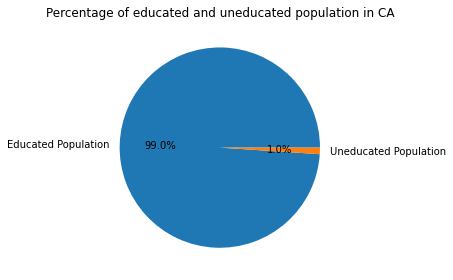

In [293]:
slices=[ca_educated,ca_uneducated]
labels=["Educated Population","Uneducated Population"]
plt.pie(slices,labels=labels,autopct="%1.1f%%")
plt.title("Percentage of educated and uneducated population in CA")
plt.tight_layout()
plt.show()

In [71]:
final_search=ca_2019_data.sort_values(by=['House Value','Monthly Rent','High School Rate',
       'College Rate','Per Capita Income', 'Unemployment Rate','Public Transport Rate',
       'Commute Time Public', 'Commute Time Car'],ascending=(True,True,False,False,False,True,False,True,True))
#final_search.columns
final_search

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
480,92328,438.0,41.4,43750.0,33262.0,12.785388,3.424658,9999.0,1991,-666666666.0,...,77.168950,8.219178,19.406393,2.511416,Death Valley,Inyo County,36.40,-117.10,331.0,CA
830,93562,1771.0,39.8,37176.0,22554.0,23.602484,4.291361,58000.0,1956,903.0,...,85.375494,5.702993,18.351214,1.863354,Trona,San Bernardino County,35.90,-117.40,1008.0,CA
798,93516,2244.0,38.2,49318.0,25361.0,32.085561,2.896613,70200.0,1959,959.0,...,70.142602,3.743316,23.885918,6.327986,Boron,Kern County,35.00,-117.60,1233.0,CA
803,93523,3556.0,27.7,62760.0,25808.0,8.042745,3.149606,74500.0,1993,923.0,...,76.996625,5.258718,17.575928,4.471316,Edwards,Kern County,35.10,-117.90,1436.0,CA
431,92242,1312.0,58.4,33276.0,21610.0,16.692073,4.192073,77700.0,1985,829.0,...,91.006098,0.533537,14.710366,0.381098,Earp,San Bernardino County,34.30,-114.30,1681.0,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,95070,31196.0,50.2,193617.0,94484.0,4.664059,1.689319,2000001.0,1967,4001.0,...,47.589435,0.461598,3.026029,47.291319,Saratoga,Santa Clara County,37.27,-122.05,11379.0,CA
942,94024,23675.0,46.6,250001.0,115518.0,1.828933,1.478353,2000001.0,1960,4001.0,...,61.951426,0.363252,5.486800,31.151003,Los Altos,Santa Clara County,37.36,-122.09,8178.0,CA
941,94022,19406.0,47.8,223859.0,130324.0,4.380089,1.478924,2000001.0,1969,4001.0,...,62.728022,0.664743,3.303102,31.052252,Los Altos,Santa Clara County,37.36,-122.15,7479.0,CA
190,91108,13375.0,47.4,165765.0,80469.0,6.706542,1.024299,2000001.0,1944,4001.0,...,32.433645,1.839252,6.272897,59.656075,San Marino,Los Angeles County,34.12,-118.12,4562.0,CA


In [68]:
filt=final_search[['Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate']]>0
final_search=final_search[filt.all(1)].reset_index(drop=True)
final_search.head(15)

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,95422,15696.0,37.7,31793.0,17221.0,32.008155,6.708716,112700.0,1976,1140.0,...,66.252548,4.319572,28.140928,0.172018,Clearlake,Lake County,38.97,-122.64,8546.0,CA
1,93702,43601.0,28.3,27159.0,11946.0,41.088507,4.096236,123500.0,1955,1062.0,...,63.411390,3.382950,76.839981,12.485952,Fresno,Fresno County,36.74,-119.75,12806.0,CA
2,93268,18731.0,29.8,39517.0,20032.0,31.450537,3.939993,140900.0,1959,1188.0,...,84.811275,1.030377,41.257808,1.404089,Taft,Kern County,35.20,-119.40,6040.0,CA
3,92277,23172.0,26.8,43080.0,21489.0,24.538236,3.474020,141200.0,1981,1177.0,...,72.678232,10.374590,23.381668,3.370447,Twentynine Palms,San Bernardino County,34.30,-115.60,11910.0,CA
4,93701,10166.0,27.1,23153.0,11030.0,45.455440,4.397010,152100.0,1960,1026.0,...,59.472752,7.505410,71.158765,11.322054,Fresno,Fresno County,36.75,-119.79,3828.0,CA
5,93305,37902.0,27.4,31471.0,13243.0,40.361986,6.759538,153800.0,1960,1174.0,...,68.793204,7.036568,72.698011,1.554008,Bakersfield,Kern County,35.39,-118.99,11964.0,CA
6,93304,49115.0,29.2,40710.0,17301.0,26.739285,5.010689,158600.0,1964,1194.0,...,55.779293,13.156877,64.874275,2.532831,Bakersfield,Kern County,35.33,-119.02,16480.0,CA
7,93703,32754.0,29.2,33550.0,15521.0,35.488795,5.123038,159500.0,1957,1169.0,...,58.859987,6.646516,62.890029,12.770959,Fresno,Fresno County,36.77,-119.76,10249.0,CA
8,92410,45052.0,28.0,35358.0,14640.0,34.349196,3.622481,161100.0,1970,1304.0,...,57.875344,11.606588,74.591583,3.251798,San Bernardino,San Bernardino County,34.10,-117.29,14224.0,CA
9,95205,38350.0,29.3,36444.0,14808.0,26.839635,4.419817,161200.0,1959,1142.0,...,64.500652,6.850065,71.582790,7.780965,Stockton,San Joaquin County,37.96,-121.26,11346.0,CA
